In [53]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [54]:
data=pd.read_csv("bank-full.csv",delimiter=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [56]:
data.shape

(45211, 17)

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
data_num=data.select_dtypes(['int64','float64'])
data_cat=data.select_dtypes(object)

In [59]:
data_num


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [60]:
data_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [61]:
for col in data_cat:
    le=LabelEncoder()
    data_cat[col]=le.fit_transform(data_cat[col])

In [62]:
data_cat.dtypes

job          int32
marital      int32
education    int32
default      int32
housing      int32
loan         int32
contact      int32
month        int32
poutcome     int32
y            int32
dtype: object

In [63]:
# dividing data into input and output variables
x= data.iloc[:,0:16]
y= data.iloc[:,16]


In [64]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [65]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [66]:
data1=pd.concat([data_num,data_cat],axis=1)
data1

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3,1
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0


In [67]:
# dividing data into input and output variables
x= data1.iloc[:,0:16]
y= data1.iloc[:,16]

In [68]:
classifier=LogisticRegression()
classifier.fit(x,y)


LogisticRegression()

In [69]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
y_pred1=pd.DataFrame({'Actual':y,'Preducted':y_pred})
y_pred1[10:15]

,Actual,Preducted
10,0,0
11,0,0
12,0,0
13,0,0
14,0,0


In [71]:
y_pred1['corrected']=y_pred1['Actual']==y_pred1['Preducted']
y_pred1['corrected']

0         True
1         True
2         True
3         True
4         True
         ...  
45206    False
45207    False
45208    False
45209     True
45210     True
Name: corrected, Length: 45211, dtype: bool

In [72]:
y_pred1['corrected'].mean()

0.8876379642122493

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
confusion_matrix

array([[39281,   641],
       [ 4439,   850]], dtype=int64)

 From above confusion matrix we interpret that 88.7% of client has subscribed term deposit and 11.3% of client has not subscribed term deposit.

In [76]:
#specificity
850/(4439+850)*100

16.071090943467574

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

# Roc Curve

Text(0, 0.5, 'True Positive Rate')

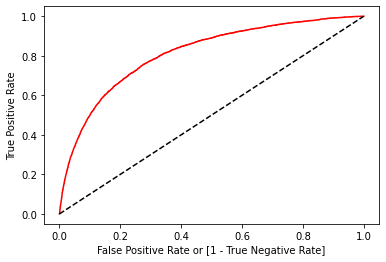

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr,  tpr,  thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [82]:
auc

0.5723272998152789

1.0


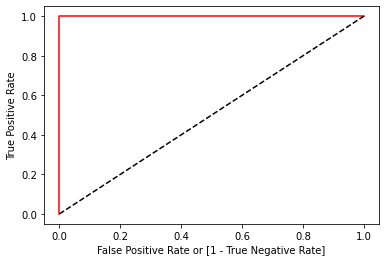

In [83]:
import numpy as np


probas = [0.505 - np.random.rand()*0.01 for _ in y]

probas = [
  0.51 - np.random.rand()*0.01 if _y else 0.49 + np.random.rand()*0.01
  for _y in y
]

acc = np.array([(_y > 0.5) == _y for _y in y])
acc.mean()

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, probas)

auc = roc_auc_score(y, probas)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

print(auc)